In [122]:
import pandas as pd
import numpy as np

## Loading Data and initial exploring

In [123]:
data = pd.read_csv('../Data/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [125]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [126]:
data_categorial = data.select_dtypes(include=['object'])
data_numerical = data.select_dtypes(include=['int64', 'float64'])

In [127]:
for column in data_categorial.columns.tolist():
    display(data_categorial[column].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

y
no     36548
yes     4640
Name: count, dtype: int64

In [128]:
data['job'] = data['job'].replace('unknown', data['job'].mode()[0])
data['marital'] = data['marital'].replace('unknown', data['marital'].mode()[0])
data['education'] = data['education'].replace('unknown', data['education'].mode()[0])
data['housing'] = data['housing'].replace('unknown', data['housing'].mode()[0])
data['loan'] = data['loan'].replace('unknown', data['loan'].mode()[0])

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }

data['month'] = data['month'].map(month_map)
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)


day_map = {
    'mon': 1,'tue': 2,'wed': 3,
    'thu': 4,'fri': 5
    }

data['day_of_week'] = data['day_of_week'].map(day_map)
data['day_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 5)
data['day_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 5)

data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [129]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_sin,month_cos,day_sin,day_cos
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.951057,0.309017
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.951057,0.309017
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.951057,0.309017
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.951057,0.309017
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.951057,0.309017


In [130]:
data_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [131]:
data['pdays'] = data['pdays'].replace(999, np.nan)
data['pdays_missing'] = data['pdays'].isna().astype(int)

# median_pdays = data['pdays'].median()
# data['pdays'] = data['pdays'].fillna(median_pdays)

data['pdays'] = data['pdays'].fillna(-1)

In [132]:
data = data.drop(columns=['month','day_of_week','default', 'duration'])

In [133]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])
data_categorial = data.select_dtypes(include=['object'])

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  float64
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
 17  month_sin       41188 non-null 

## EDA

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

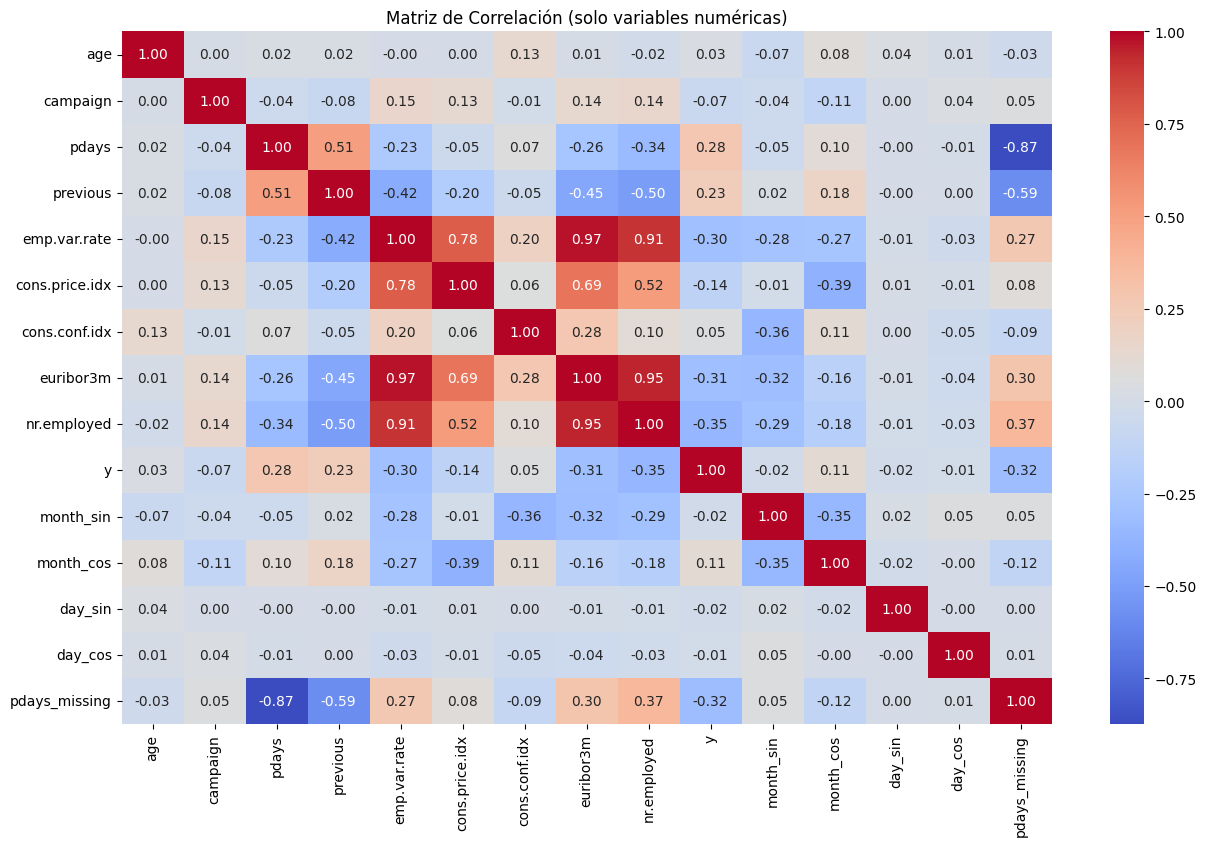

In [136]:
corr_matrix = data_numerical.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación (solo variables numéricas)")
plt.show()

y
0    36548
1     4640
Name: count, dtype: int64


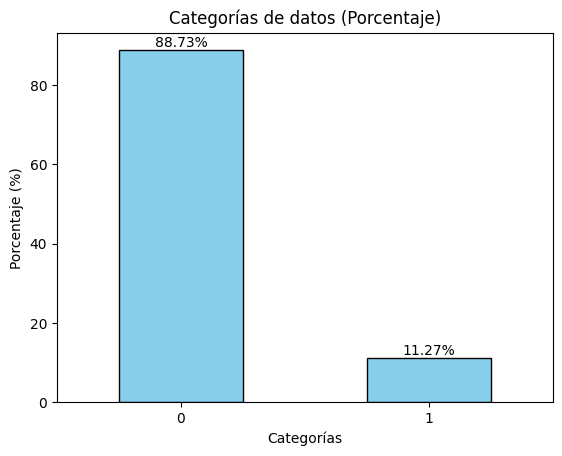

In [137]:
counts = data['y'].value_counts(normalize=True) * 100
print(data['y'].value_counts())

ax = counts.plot(kind="bar", color="skyblue", edgecolor="black")
ax.bar_label(ax.containers[0], fmt="%.2f%%")

plt.title("Categorías de datos (Porcentaje)")
plt.xlabel("Categorías")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.show()

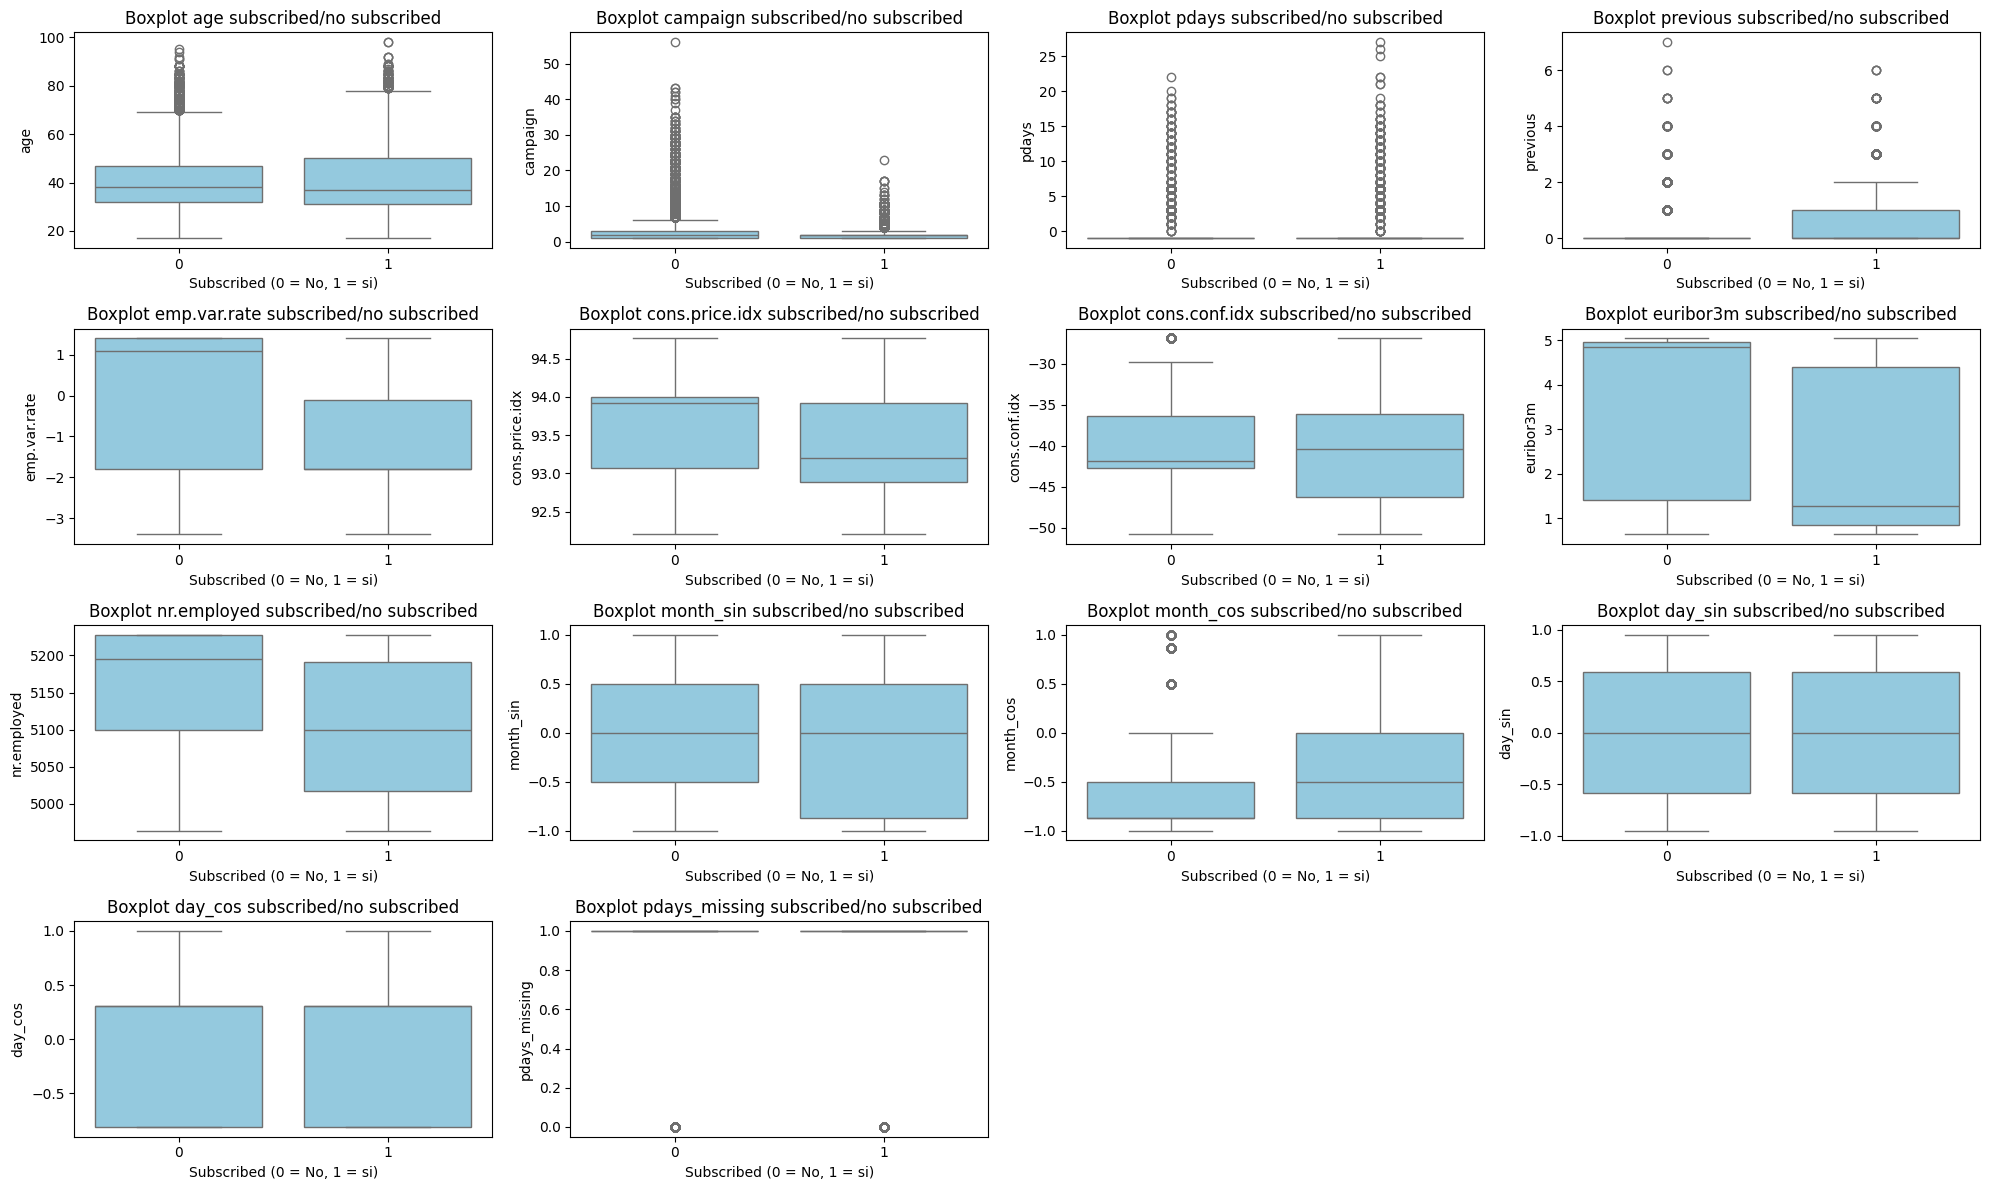

In [138]:
import math

columns_num = data_numerical.columns.tolist()
columns_num.remove('y')

n_cols = 4
n_vars = len(columns_num)
n_rows = math.ceil(n_vars / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 3))

for i, col in enumerate(columns_num, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x="y", y=col, data=data_numerical, color='skyblue')
    plt.title(f"Boxplot {col} subscribed/no subscribed")
    plt.xlabel("Subscribed (0 = No, 1 = si)")
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

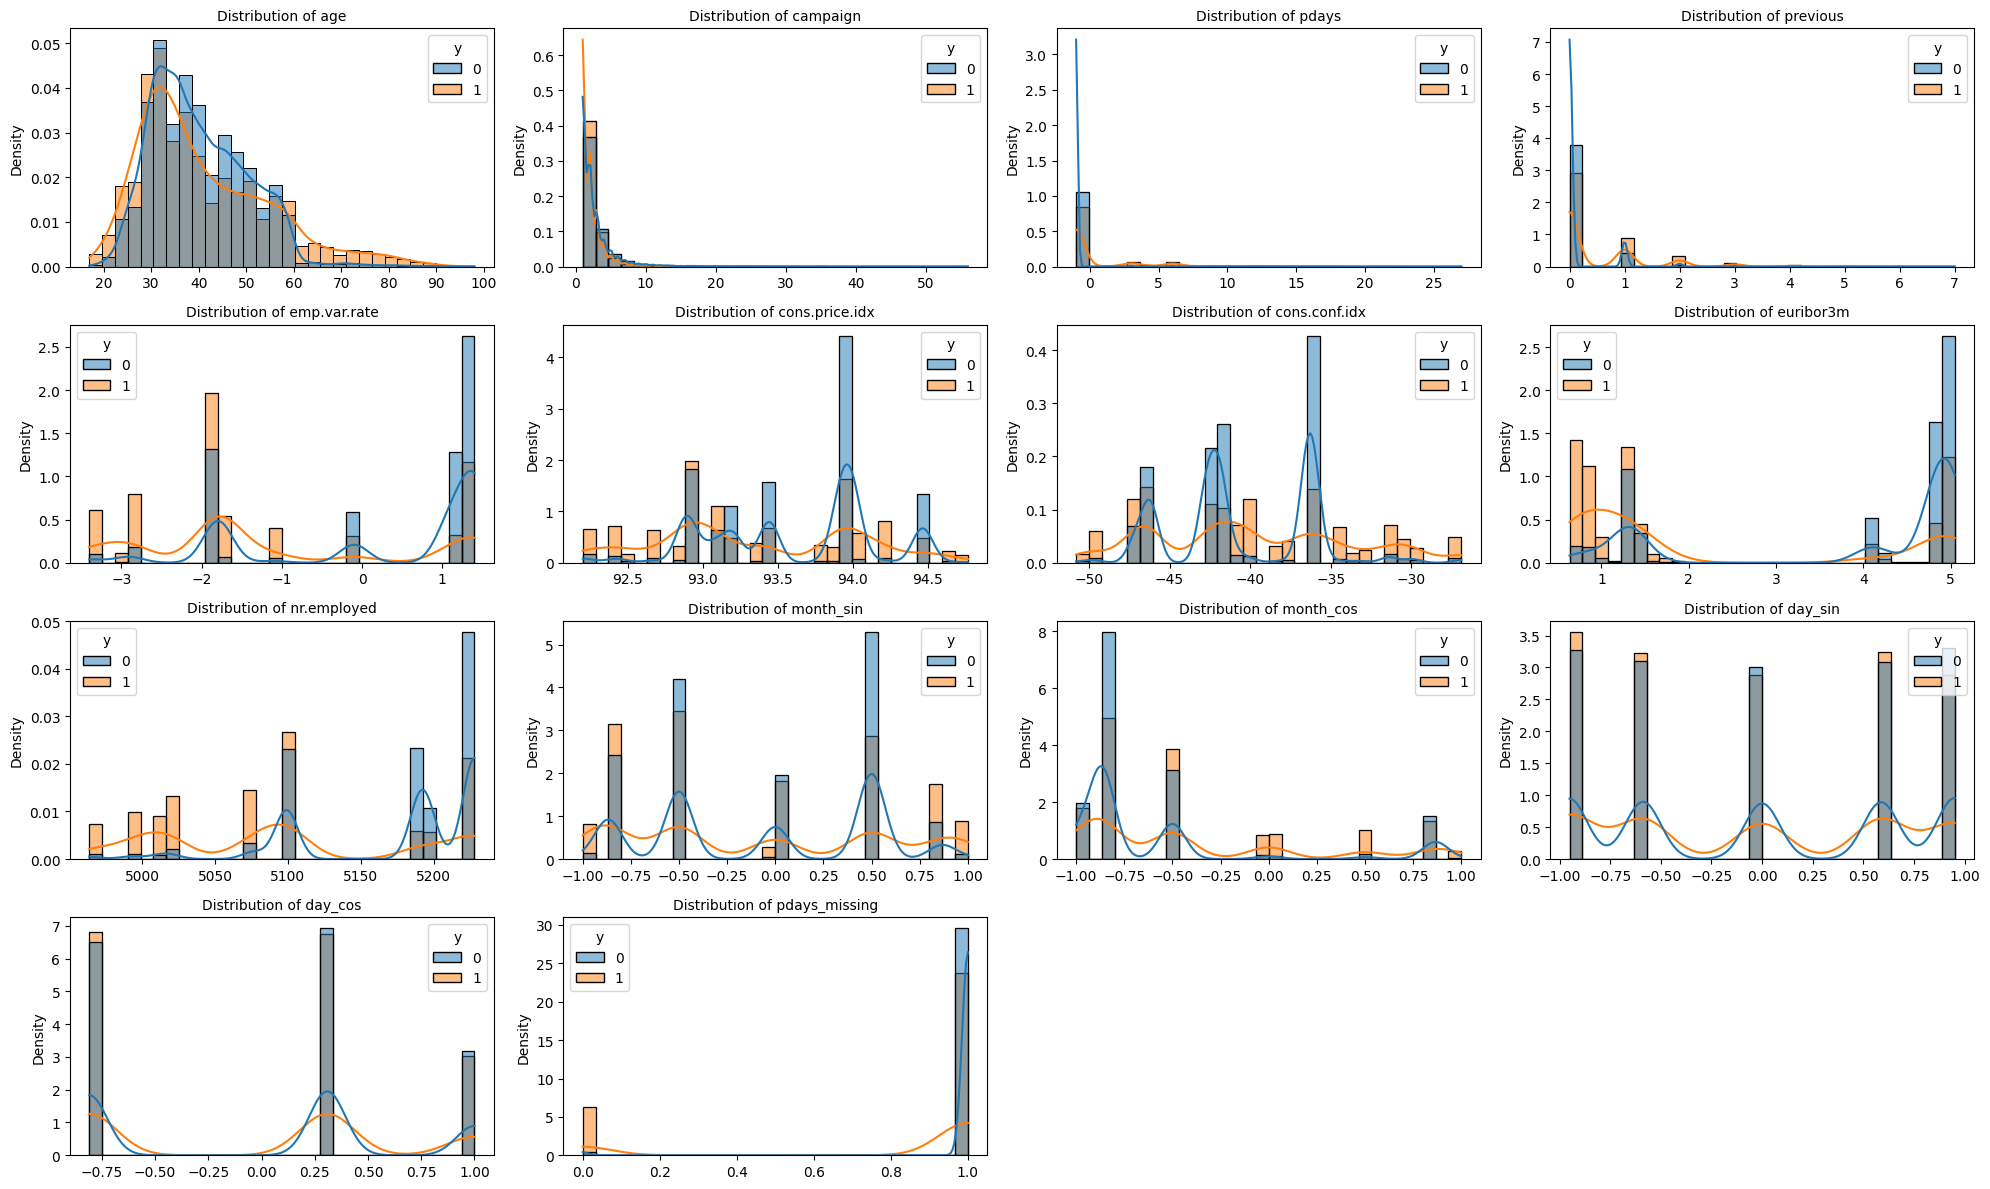

In [139]:
n_cols = 4
n_vars = len(columns_num)
n_rows = math.ceil(n_vars / n_cols)

# Tamaño ajustado de figura
plt.figure(figsize=(n_cols * 5, n_rows * 3))

# Crear boxplots en múltiples columnas
for i, col in enumerate(columns_num, 1):
    plt.subplot(n_rows, n_cols, i)
    if data_numerical[col].nunique() > 1:
        sns.histplot(data=data_numerical, x=col, hue="y",
                     kde=True, stat="density",
                     common_norm=False, bins=30, alpha=0.5)
    else:
        sns.histplot(data=data_numerical, x=col, hue="y",
                     kde=False, stat="count",
                     bins=1, alpha=0.5)
    
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Density')
    plt.tight_layout()

plt.show()

In [140]:
data['campaign_log'] = np.log1p(data['campaign'])
data['previous_log'] = np.log1p(data['previous'])

# drop variables correlated and transformed
data = data.drop(columns=['emp.var.rate', 'euribor3m','previous','campaign'])

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   pdays           41188 non-null  float64
 8   poutcome        41188 non-null  object 
 9   cons.price.idx  41188 non-null  float64
 10  cons.conf.idx   41188 non-null  float64
 11  nr.employed     41188 non-null  float64
 12  y               41188 non-null  int64  
 13  month_sin       41188 non-null  float64
 14  month_cos       41188 non-null  float64
 15  day_sin         41188 non-null  float64
 16  day_cos         41188 non-null  float64
 17  pdays_missing   41188 non-null 

In [142]:
# Varibales for scaling and encoding
numeric_features = ['age', 'pdays', 'campaign_log', 'previous_log', 
                    'cons.price.idx', 'cons.conf.idx', 'nr.employed']

categorical_features = ['job', 'marital', 'education', 'housing', 
                        'loan', 'contact', 'poutcome']

passthrough_features = ['month_sin','month_cos','day_sin','day_cos','pdays_missing']

## Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.drop('y', axis=1)
y = data['y']

train_size = 0.8
val_size = 0.1
test_size = 0.1

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = (1 - train_size),
                                                            random_state=42, 
                                                            stratify=y
                                                            )

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test , test_size = (test_size / (val_size + test_size)), 
                            random_state=42, 
                            stratify=y_val_test
                            )

In [145]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pass', 'passthrough', passthrough_features),
    ])

preprocessor.set_output(transform="pandas")

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


neg, pos = y_train.value_counts()[0], y_train.value_counts()[1]
scale_pos_weight = neg / pos

# Definir y entrenar modelos
models = {
    'LinearClassifier': LogisticRegression(
        class_weight='balanced', 
        random_state=42
        ),
    'RandomForestClassifier': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced', 
        random_state=42
        ),
    'XGBClassifier': XGBClassifier(
        eval_metric='logloss', 
        scale_pos_weight=scale_pos_weight, 
        random_state=42
        ),
    'LGBMClassifier': LGBMClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        verbose=-1
        )
}

all_metrics = {}
best_model = None
best_recall = -1

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_val_processed)
    y_proba = model.predict_proba(X_val_processed)[:, 1]

    recall = f1_score(y_val, y_pred)

    all_metrics[name] = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall,
        'f1_score': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_proba)
    }

    if recall > best_recall:
        best_recall = recall
        best_model = model

models_result = pd.DataFrame.from_dict(all_metrics, orient='index')
display(models_result)

print(f'Best model for recall metric: {best_model.__class__.__name__}')
print(f'{best_model.__class__.__name__} recall: {best_recall:.4f}')

,accuracy,precision,recall,f1_score,roc_auc
LinearClassifier,0.785385,0.299235,0.414570,0.414570,0.786474
RandomForestClassifier,0.890507,0.525097,0.376210,0.376210,0.774081
XGBClassifier,0.842680,0.377005,0.465347,0.465347,0.780266
LGBMClassifier,0.848750,0.390345,0.476030,0.476030,0.794693


Best model for recall metric: LGBMClassifier
LGBMClassifier recall: 0.4760


In [147]:
from sklearn.model_selection import RandomizedSearchCV 

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.3],
    'feature_fraction': [0.5, 1.0],
    'bagging_fraction': [0.5, 1.0],
    'num_leaves': [20, 100],
    'lambda_l1': [0.0, 1.0],
    'lambda_l2': [0.0, 1.0],
}


lgbm = LGBMClassifier(
    objective='binary', 
    scale_pos_weight=scale_pos_weight, 
    random_state=42,
    verbose=-1
)


random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid, 
    scoring='recall',
    cv=5,
    n_iter=100, 
    random_state=42, 
    verbose=1
)

random_search.fit(X_train_processed, y_train)

# Results
best_lgbm = random_search.best_estimator_

print(f"Mejores parámetros encontrados: {random_search.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros encontrados: {'num_leaves': 20, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3, 'lambda_l2': 1.0, 'lambda_l1': 1.0, 'feature_fraction': 0.5, 'bagging_fraction': 0.5}


              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3655
           1       0.38      0.63      0.48       464

    accuracy                           0.84      4119
   macro avg       0.67      0.75      0.69      4119
weighted avg       0.89      0.84      0.86      4119

ROC-AUC Score (Test Set): 0.7516


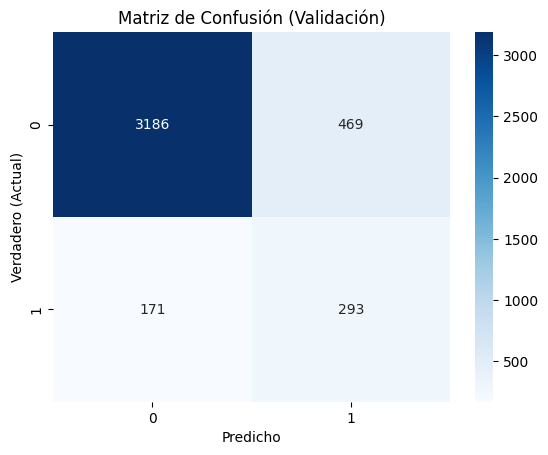

In [153]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred_val = best_lgbm.predict(X_val_processed)
y_proba_val = best_lgbm.predict_proba(X_val_processed)[:, 1]

print(classification_report(y_val, y_pred_val))

auc_val = roc_auc_score(y_val, y_pred_val)
print(f"ROC-AUC Score (Test Set): {auc_val:.4f}")

cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Validación)')
plt.ylabel('Verdadero (Actual)')
plt.xlabel('Predicho')
plt.show()


Reporte de Clasificación (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3655
           1       0.38      0.66      0.49       464

    accuracy                           0.84      4119
   macro avg       0.67      0.76      0.70      4119
weighted avg       0.89      0.84      0.86      4119

ROC-AUC Score (Test Set): 0.8114


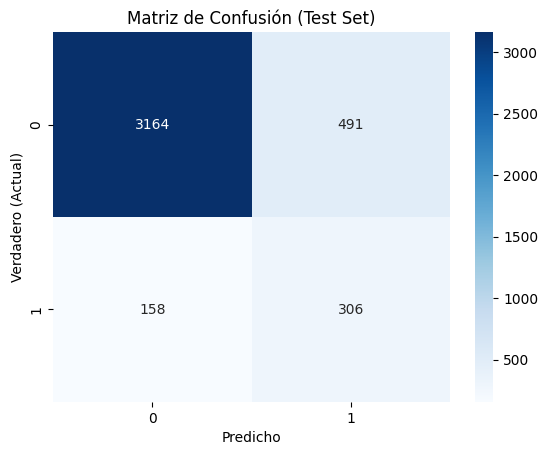

In [150]:
y_pred_test = best_lgbm.predict(X_test_processed)
y_proba_test = best_lgbm.predict_proba(X_test_processed)[:, 1]

print("\nReporte de Clasificación (Test Set):")
print(classification_report(y_test, y_pred_test))

auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC Score (Test Set): {auc_test:.4f}")

cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Test Set)')
plt.ylabel('Verdadero (Actual)')
plt.xlabel('Predicho')
plt.show()

Mejor F1-Score (Optimizado): 0.5228
Mejor Umbral (Threshold) para ese F1: 0.6830


/tmp/ipykernel_30992/972227897.py:11: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])


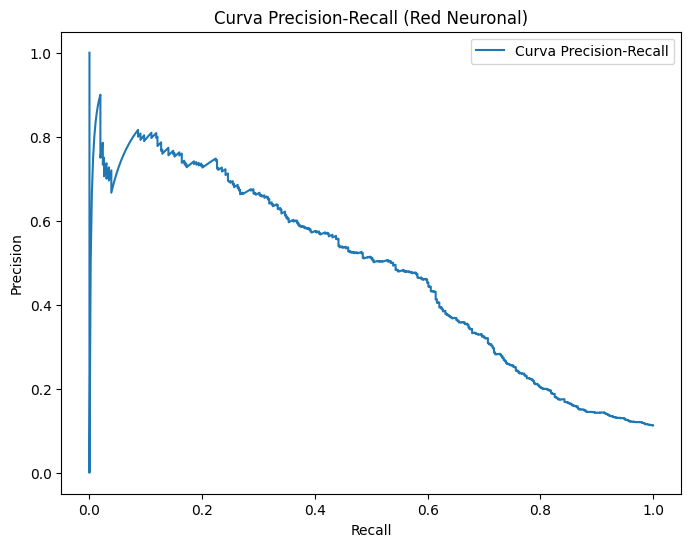

In [173]:
from sklearn.metrics import precision_recall_curve, f1_score


y_proba_lgbm = best_lgbm.predict_proba(X_val_processed)[:, 1]

# 1. Calcular los puntos de la curva (igual que antes)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba_lgbm)

# 2. Calcular F1-Score para cada umbral
# Nota: Debemos recortar 'precisions' y 'recalls' para que coincidan con 'thresholds'
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

f1_scores = np.nan_to_num(f1_scores, nan=0.0)

# 5. Encontrar el índice (ix) del F1-Score más alto (ahora sin nans)
ix = np.argmax(f1_scores)

# 6. Obtener el umbral ganador
best_threshold_lgbm = thresholds[ix]
best_f1 = f1_scores[ix]

print(f"Mejor F1-Score (Optimizado): {best_f1:.4f}")
print(f"Mejor Umbral (Threshold) para ese F1: {best_threshold_lgbm:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Red Neuronal)')
plt.legend()
plt.show()


Reporte de Clasificación (Test Set con Umbral Optimizado):
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3655
           1       0.49      0.60      0.54       464

    accuracy                           0.88      4119
   macro avg       0.72      0.76      0.74      4119
weighted avg       0.90      0.88      0.89      4119

ROC-AUC Score (Test Set): 0.8114


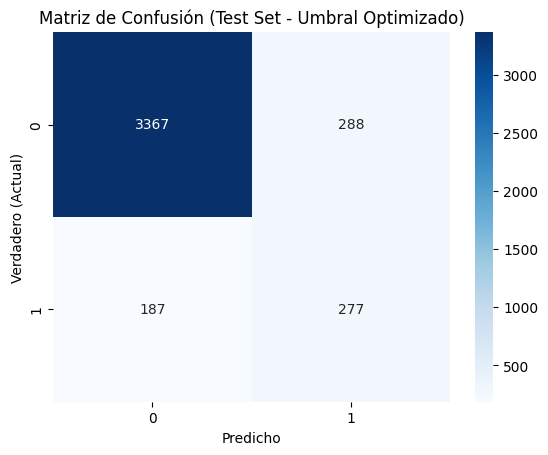

In [174]:
y_proba_test = best_lgbm.predict_proba(X_test_processed)[:, 1]

# 2. --- ¡AQUÍ PONES EL UMBRAL! ---
# Crear las predicciones (0/1) usando tu umbral optimizado
y_pred_test = (y_proba_test > best_threshold_lgbm).astype(int)

# 3. Ahora, todas las métricas usarán tus predicciones optimizadas
print("\nReporte de Clasificación (Test Set con Umbral Optimizado):")
print(classification_report(y_test, y_pred_test))

# 4. El AUC no cambia con el umbral, por eso usamos las probabilidades
auc_test = roc_auc_score(y_test, y_proba_test)
print(f"ROC-AUC Score (Test Set): {auc_test:.4f}")

# 5. La Matriz de Confusión ahora reflejará tu nuevo umbral
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Test Set - Umbral Optimizado)')
plt.ylabel('Verdadero (Actual)')
plt.xlabel('Predicho')
plt.show()

## Explore neural network

In [154]:
total = len(y_train)
pos = y_train.sum()
neg = total - pos

# Fórmula para Keras
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Peso para clase 0: {weight_for_0:.2f}")
print(f"Peso para clase 1: {weight_for_1:.2f}")

Peso para clase 0: 0.56
Peso para clase 1: 4.44


In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)))
model_nn.add(Dropout(0.3)) # Dropout para prevenir overfitting
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(1, activation='sigmoid')) # 1 neurona + 'sigmoid' para clasificación binaria

# B. Compilar el Modelo
model_nn.compile(
    optimizer='adam', 
    loss='binary_crossentropy', # Loss estándar para binario
    metrics=['accuracy', tf.keras.metrics.Recall()] # ¡Monitorea el Recall!
)

# C. Entrenar el Modelo
# (Usa 'epochs' para definir cuántas pasadas, y 'batch_size')
history = model_nn.fit(
    X_train_processed, 
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_processed, y_val), # ¡Usa tu set de validación!
    class_weight=class_weight, # ¡Aplica el peso para el desbalance!
    verbose=1
)

# D. Evaluar el modelo (en el set de validación)
y_proba_nn = model_nn.predict(X_val_processed)
y_pred_nn = (y_proba_nn > 0.5).astype(int) # Convertir probabilidades a 0 o 1

print("\n--- Evaluación de la Red Neuronal (Validación) ---")
print(classification_report(y_val, y_pred_nn))

2025-11-17 19:10:40.379700: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 19:10:40.930360: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 19:10:46.800477: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/leonel-unix/workspace/dtc-ml-midterm-project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-17 19:1

Epoch 1/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7354 - loss: 0.5873 - recall: 0.6468 - val_accuracy: 0.8126 - val_loss: 0.5249 - val_recall: 0.6487
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7914 - loss: 0.5612 - recall: 0.6433 - val_accuracy: 0.8201 - val_loss: 0.5213 - val_recall: 0.6509
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7968 - loss: 0.5586 - recall: 0.6339 - val_accuracy: 0.8405 - val_loss: 0.5074 - val_recall: 0.6293
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8049 - loss: 0.5541 - recall: 0.6358 - val_accuracy: 0.8196 - val_loss: 0.5191 - val_recall: 0.6487
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8099 - loss: 0.5510 - recall: 0.6309 - val_accuracy: 0.8315 - val_loss: 0.4966 - val_recall: 0.6444
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8126 - loss: 0.5516 - recall: 0.6239 - val_accuracy: 0.8288 - val_loss: 0.4982 - val_recall: 0.6444
Epoc

In [156]:
import keras_tuner as kt

# 1. Define una función que "construye" el modelo
# 'hp' (hiperparámetros) es un objeto especial que te da KerasTuner
def build_model(hp):
    model = Sequential()
    
    # --- Aquí ocurre la magia del tuning ---
    # 1. Tunear la primera capa
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32), # Prueba 32, 64, 96, 128
        activation='relu',
        input_shape=(X_train_processed.shape[1],)
    ))
    
    # 2. Tunear la tasa de Dropout
    model.add(Dropout(
        rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1) # Prueba 0.2, 0.3, 0.4...
    ))
    
    # 3. Tunear si queremos una segunda capa o no
    if hp.Boolean('has_second_layer'):
        model.add(Dense(
            units=hp.Int('units_2', min_value=16, max_value=64, step=16),
            activation='relu'
        ))
    # --- Fin de la magia ---
    
    model.add(Dense(1, activation='sigmoid')) # Capa de salida fija
    
    # 4. Tunear la tasa de aprendizaje del optimizador
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) # 0.01, 0.001, o 0.0001
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Recall(name='recall')] # Optimiza para Recall
    )
    return model


# 2. Configura el "Tuner" (Buscador)
# Es como RandomizedSearchCV
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective('val_recall', direction='max'), # ¡Optimiza para max val_recall!
    max_trials=10,  # <-- El n_iter, cuántos modelos probar
    executions_per_trial=2, # Cuántas veces entrenar cada modelo
    directory='my_keras_tuner',
    project_name='bank_marketing'
)

# 3. Inicia la búsqueda
# (Usa los pesos de clase que ya calculamos)
tuner.search(
    X_train_processed, 
    y_train, 
    epochs=10, 
    validation_data=(X_val_processed, y_val),
    class_weight=class_weight
)

# 4. Obtén el mejor modelo
best_model_nn = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Mejores hiperparámetros encontrados: {best_hps.values}")

Trial 10 Complete [00h 00m 29s]
val_recall: 0.6831896603107452

Best val_recall So Far: 0.7036637961864471
Total elapsed time: 00h 04m 42s
Mejores hiperparámetros encontrados: {'units_1': 128, 'dropout_1': 0.30000000000000004, 'has_second_layer': False, 'learning_rate': 0.0001}


/home/leonel-unix/workspace/dtc-ml-midterm-project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/leonel-unix/workspace/dtc-ml-midterm-project/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [157]:
print("--- Evaluación de la Red Neuronal Optimizada (Validación) ---")

# 1. Obtener probabilidades (esto es como el .predict_proba() de sklearn)
y_proba_val_nn = best_model_nn.predict(X_val_processed)

# 2. Convertir probabilidades a clases (0 o 1)
y_pred_val_nn = (y_proba_val_nn > 0.5).astype(int)

# 3. Imprimir el reporte (para ver tu Recall)
print(classification_report(y_val, y_pred_val_nn))

# 4. Imprimir el ROC-AUC (usa las probabilidades)
auc_val_nn = roc_auc_score(y_val, y_proba_val_nn)
print(f"ROC-AUC Score (Validación): {auc_val_nn:.4f}")

--- Evaluación de la Red Neuronal Optimizada (Validación) ---
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      3655
           1       0.25      0.70      0.37       464

    accuracy                           0.72      4119
   macro avg       0.60      0.72      0.59      4119
weighted avg       0.87      0.72      0.77      4119

ROC-AUC Score (Validación): 0.7729



--- Evaluación FINAL de la Red Neuronal (Test Set) ---
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      3655
           1       0.26      0.74      0.38       464

    accuracy                           0.73      4119
   macro avg       0.61      0.73      0.61      4119
weighted avg       0.88      0.73      0.78      4119

ROC-AUC Score (Test): 0.7852

Generando Matriz de Confusión (Validación)...


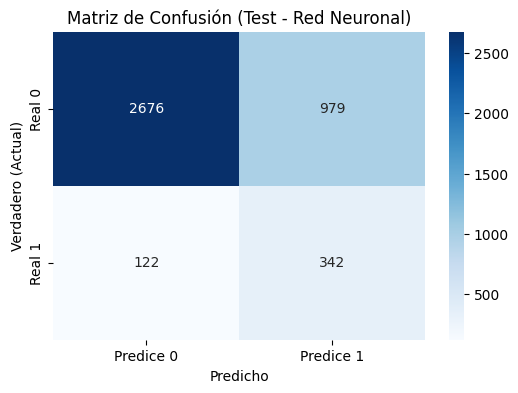

In [164]:
print("\n--- Evaluación FINAL de la Red Neuronal (Test Set) ---")

# 1. Obtener probabilidades
y_proba_test_nn = best_model_nn.predict(X_test_processed)

# 2. Convertir a clases
y_pred_test_nn = (y_proba_test_nn > 0.5).astype(int)

# 3. Imprimir el reporte final
print(classification_report(y_test, y_pred_test_nn))

# 4. Imprimir el ROC-AUC final
auc_test_nn = roc_auc_score(y_test, y_proba_test_nn)
print(f"ROC-AUC Score (Test): {auc_test_nn:.4f}")


# 5. --- AÑADIDO: Graficar la Matriz de Confusión ---
print("\nGenerando Matriz de Confusión (Validación)...")
cm_val_nn = confusion_matrix(y_test, y_pred_test_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_nn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predice 0', 'Predice 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión (Test - Red Neuronal)')
plt.ylabel('Verdadero (Actual)')
plt.xlabel('Predicho')
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step


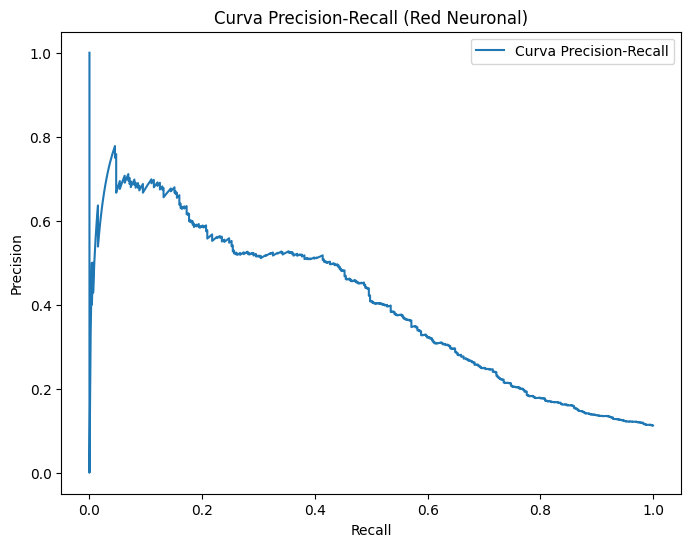

In [172]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1. Obtener las probabilidades de tu modelo
# (Usa el set de VALIDACIÓN, no el de prueba)
y_proba_nn = best_model_nn.predict(X_val_processed) 

# 2. Calcular los puntos de la curva
precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba_nn)

# 3. Graficar la curva
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Red Neuronal)')
plt.legend()
plt.show()

In [167]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# 1. Calcular los puntos de la curva (igual que antes)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba_nn)

# 2. Calcular F1-Score para cada umbral
# Nota: Debemos recortar 'precisions' y 'recalls' para que coincidan con 'thresholds'
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

f1_scores = np.nan_to_num(f1_scores, nan=0.0)

# 5. Encontrar el índice (ix) del F1-Score más alto (ahora sin nans)
ix = np.argmax(f1_scores)

# 6. Obtener el umbral ganador
best_threshold_nn = thresholds[ix]
best_f1 = f1_scores[ix]

print(f"Mejor F1-Score (Optimizado): {best_f1:.4f}")
print(f"Mejor Umbral (Threshold) para ese F1: {best_threshold_nn:.4f}")

Mejor F1-Score (Optimizado): 0.4694
Mejor Umbral (Threshold) para ese F1: 0.6187


/tmp/ipykernel_30992/3245586475.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])



--- Evaluación FINAL de la Red Neuronal (Test Set) ---
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3655
           1       0.44      0.47      0.46       464

    accuracy                           0.87      4119
   macro avg       0.69      0.70      0.69      4119
weighted avg       0.88      0.87      0.87      4119

ROC-AUC Score (Test): 0.7852

Generando Matriz de Confusión (Validación)...


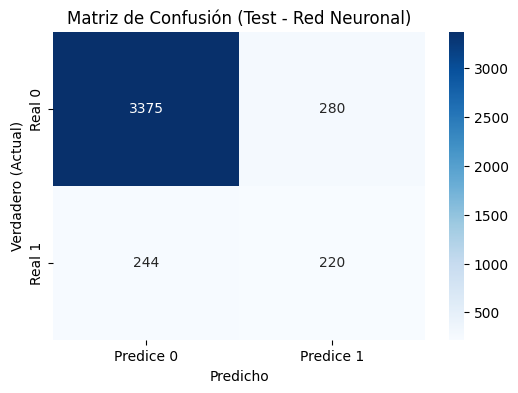

In [168]:
print("\n--- Evaluación FINAL de la Red Neuronal (Test Set) ---")

# 1. Obtener probabilidades
y_proba_test_nn = best_model_nn.predict(X_test_processed)

# 2. Convertir a clases
y_pred_test_nn = (y_proba_test_nn > best_threshold_nn).astype(int)

# 3. Imprimir el reporte final
print(classification_report(y_test, y_pred_test_nn))

# 4. Imprimir el ROC-AUC final
auc_test_nn = roc_auc_score(y_test, y_proba_test_nn)
print(f"ROC-AUC Score (Test): {auc_test_nn:.4f}")


# 5. --- AÑADIDO: Graficar la Matriz de Confusión ---
print("\nGenerando Matriz de Confusión (Validación)...")
cm_val_nn = confusion_matrix(y_test, y_pred_test_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_nn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predice 0', 'Predice 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión (Test - Red Neuronal)')
plt.ylabel('Verdadero (Actual)')
plt.xlabel('Predicho')
plt.show()